In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats

import os
import subprocess
import sys
import shutil

import codecs

In [2]:
from libraryIR import *
path_to_pool = "C:\\Users\\DavideDP\\AnacondaProjects\\Project\\terrier-core-4.2\\share\\TIPSTER\\pool\\qrels.trec7.txt"     

### We execute different Comb algorithms on a random set of systems and we progressively increased the number of systems used

In [17]:
path = "C:\\Users\\alvis\\Desktop\\Reperimento_dell_Informazione\\Project\\temp"     
dir_in = "input"   
dir_w = "weights"       
dir_norm = "norm"
dir_comb = "comb"

filename_list = listFiles(path, dir_norm)
np.random.seed(seed=1156818)
combList="comb_anz.txt","comb_max.txt",'comb_median.txt','comb_min.txt','comb_mnz.txt','comb_sum.txt'
results={}
        

for i in range(1,len(filename_list)+1,1):
    print i
    
    if(i<=5):
        repeat=1
    else:
        repeat=1
        
    results[i]={"comb_anz.txt":0,"comb_max.txt":0,"comb_median.txt":0,"comb_min.txt":0, "comb_mnz.txt":0,"comb_sum.txt":0}
    for j in range(0,repeat,1):
        perm=np.random.permutation(filename_list)[0:i]
        print "Ripetizione numero: "+str(j)
        #print perm
        #Calcolo condorcet e condercet_pesato
        comb_anz(perm, path, dir_norm, dir_comb)
        comb_min(perm, path, dir_norm, dir_comb)
        comb_median(perm, path, dir_norm, dir_comb)
        comb_sum(perm, path, dir_norm, dir_comb)
        comb_mnz(perm, path, dir_norm, dir_comb)
        comb_max(perm, path, dir_norm, dir_comb)
        for filename in combList:
            MAP=take_MAP(path,dir_comb,dir_w,filename,False)#calcolo il MAP
            results[i][filename]+=MAP
    #calcolo media per i sistemi   
    for filename in combList:
        results[i][filename]=results[i][filename]/repeat
    #results[i]["condorcetWeighted.txt"]=results[i]["condorcetWeighted.txt"]/repeat

1
Ripetizione numero: 0
2
Ripetizione numero: 0
3
Ripetizione numero: 0
4
Ripetizione numero: 0
5
Ripetizione numero: 0
6
Ripetizione numero: 0
7
Ripetizione numero: 0
8
Ripetizione numero: 0
9
Ripetizione numero: 0
10
Ripetizione numero: 0


In [18]:
print results

{1: {'comb_min.txt': 0.0727569170341, 'comb_anz.txt': 0.0727569170341, 'comb_median.txt': 0.0727569170341, 'comb_max.txt': 0.0727569170341, 'comb_mnz.txt': 0.0727569170341, 'comb_sum.txt': 0.0727569170341}, 2: {'comb_min.txt': 0.0772871378348, 'comb_anz.txt': 0.0772209399826, 'comb_median.txt': 0.0772209399826, 'comb_max.txt': 0.07528196801, 'comb_mnz.txt': 0.077474116713, 'comb_sum.txt': 0.077474116713}, 3: {'comb_min.txt': 0.0712742651261, 'comb_anz.txt': 0.0728166572468, 'comb_median.txt': 0.0730704233088, 'comb_max.txt': 0.0703324583026, 'comb_mnz.txt': 0.0734916280921, 'comb_sum.txt': 0.0734916280921}, 4: {'comb_min.txt': 0.0701295597452, 'comb_anz.txt': 0.0731400242455, 'comb_median.txt': 0.072923723292, 'comb_max.txt': 0.07015388364, 'comb_mnz.txt': 0.0769665469222, 'comb_sum.txt': 0.0769598374628}, 5: {'comb_min.txt': 0.0709782028789, 'comb_anz.txt': 0.0742496331777, 'comb_median.txt': 0.0732140921497, 'comb_max.txt': 0.0704736768258, 'comb_mnz.txt': 0.0760495669495, 'comb_sum.

In [34]:
keys=results.keys()
x=[]+keys
y={}
for cl in combList:
    y[cl]=list()

for i in range(1,len(keys)+1):
    for cl in combList:
        y[cl].append(results[i][cl])

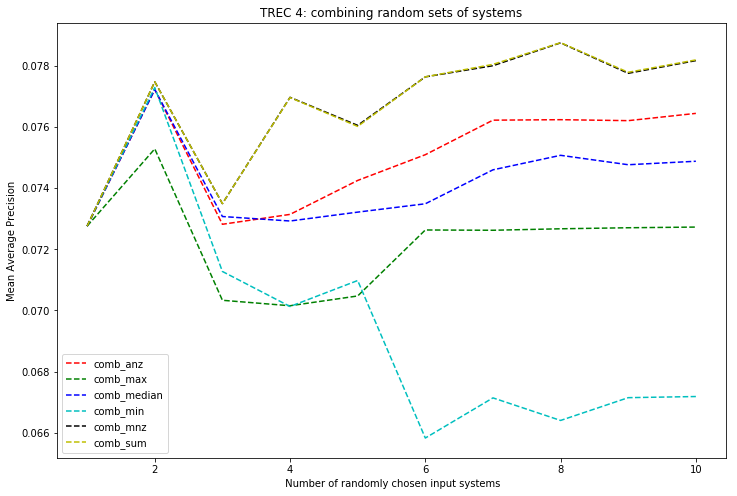

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams["figure.figsize"]=[12,8]
colors=["r","g", "b", "c", "k", "y"]

plt.xlabel(' Number of randomly chosen input systems')
plt.ylabel('Mean Average Precision')
plt.title('TREC 4: combining random sets of systems')
for i in range(len(combList)):
    plt.plot(x,y[combList[i]],colors[i]+"--")
plt.legend( [s.replace(".txt","") for s in combList])
plt.show()